# Machine Learning Exam_Example



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib
import seaborn as sns

## Task 1

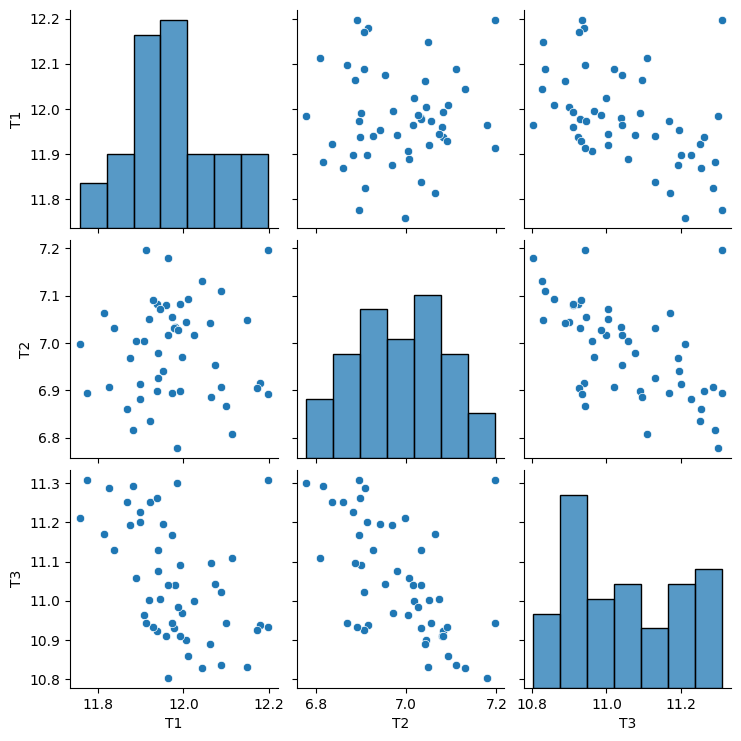

,T1,T2,T3
count,50.000000,50.000000,50.000000
mean,11.977452,6.985644,11.051325
std,0.104141,0.101945,0.148846
min,11.758092,6.778757,10.803146
25%,11.914365,6.900462,10.933034
50%,11.968393,7.000857,11.030650
75%,12.038656,7.053814,11.186610
max,12.197611,7.196638,11.309532


The outlier has index of [17]


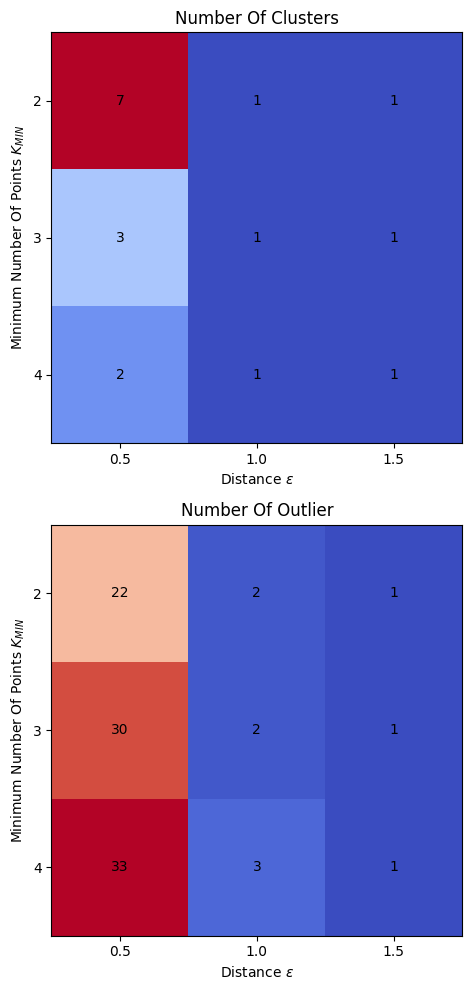

In [3]:
# Data loading
X = pd.read_csv("BrakeCaliperThickness_1.csv", sep=",")

# a. Create a pairplot
sns.pairplot(X)
plt.show()

# b. Data statistical description
display(X.describe())

# c. Outlier detection DBSCAN
# Standardize data
scaler = StandardScaler()
scaler.fit(X)
X_standard = scaler.transform(X)

# Generate an array of combinations for hyperparameters epsilon and kmin
eps = np.arange(0.5, 2, 0.5)
kmin = np.arange(2, 5, 1)
EPS, KMIN = np.meshgrid(eps, kmin)
outlier = np.zeros(EPS.shape)
cluster_numbers = np.zeros(EPS.shape)   

# Gridsearch For-Loops
for m in range(eps.shape[0]):
    for n in range(kmin.shape[0]):
        db = DBSCAN(min_samples=KMIN[n, m], eps=EPS[n, m], metric='euclidean').fit(X_standard)
        labels = db.labels_
        outlier[n, m] = list(labels).count(-1)
        cluster_numbers[n, m] = len(set(labels)) - (1 if -1 in labels else 0)


# Heatmaps for outliers and number of clusters
[ax2, ax1] = plt.figure(1, figsize=(7, 10)).subplots(2, 1)
ax1.imshow(outlier, cmap='coolwarm')
ax1.set_xticks(np.arange(len(eps)))
ax1.set_yticks(np.arange(len(kmin)))
ax1.set_xticklabels(eps)
ax1.set_yticklabels(kmin)
for m in range(eps.shape[0]):
    for n in range(kmin.shape[0]):
        text = ax1.text(m, n, int(outlier[n, m]),
                        ha='center', va='center', color='k')
ax1.set_title(r'Number Of Outlier')
ax1.set_xlabel(r'Distance $\epsilon$')
ax1.set_ylabel(r'Minimum Number Of Points $K_{MIN}$')

ax2.imshow(cluster_numbers, cmap='coolwarm')
ax2.set_xticks(np.arange(len(eps)))
ax2.set_yticks(np.arange(len(kmin)))
ax2.set_xticklabels(eps)
ax2.set_yticklabels(kmin)
for m in range(eps.shape[0]):
    for n in range(kmin.shape[0]):
        text = ax2.text(m, n, int(cluster_numbers[n, m]),
                        ha='center', va='center', color='k')
ax2.set_title(r'Number Of Clusters')
ax2.set_xlabel(r'Distance $\epsilon$')
ax2.set_ylabel(r'Minimum Number Of Points $K_{MIN}$')
plt.tight_layout()

#DBSCAN for optimized parameters
db = DBSCAN(min_samples=3, eps=1.5, metric='euclidean').fit(X_standard)

X['cluster'] = db.labels_
outlier_index = X[X['cluster'] ==-1].index.tolist()

print(f'The outlier has index of {outlier_index}')